Tarea 2 unidad 2

1. Carga la base de datos precios_muestra.csv y calcula lo siguiente:

• los rendimientos simples;
• la media y la desviación estándar de los rendimientos.

In [1]:
import pandas as pd

d = pd.read_csv("precios_muestra.csv")
d

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [2]:
rs= d.pct_change().dropna()
rs #Rendimientos simples

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [3]:
rs.describe() #media y la desviación estándar de los rendimientos


,BLUE,ORANGE
count,12.000000,12.000000
mean,0.010000,0.010000
std,0.023977,0.079601
min,-0.031763,-0.168261
25%,-0.011734,-0.037525
50%,0.016655,0.031852
75%,0.030355,0.070077
max,0.037786,0.117008


2.- Ahora que tenemos una serie de rendimientos de 12 meses, podemos producir el rendimiento com- puesto multiplicando los rendimientos de los períodos individuales, siempre y cuando los rendimien- tos se expresen como tasas de crecimiento.

In [4]:
rc0 =(rs+1).prod()
rc=(rc0 - 1) #tasa de crecimiento anual
rc

BLUE      0.123310
ORANGE    0.087167
dtype: float64

3.Anualiza un 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria.

In [5]:
rcmensual = (rc+1)**(12)-1
rcmensual #Rendimiento mensual de la tasa

BLUE      3.036427
ORANGE    1.726183
dtype: float64

In [6]:
rctrimestral = (rc+1)**(4)-1
rctrimestral #Rendimiento trimestral de la tasa

BLUE      0.592205
ORANGE    0.396963
dtype: float64

In [7]:
rcdiario = (rc+1)**(252)-1
rcdiario #Rendimiento diario de la tasa

BLUE      5.320337e+12
ORANGE    1.401702e+09
dtype: float64

Ahora lo hacemos con 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria.

In [8]:
rcmensualt = (.01+1)**(12)-1
rcmensual #Rendimiento mensual de la tasa de %1

BLUE      3.036427
ORANGE    1.726183
dtype: float64

In [9]:
rctrimestralt = (.04+1)**(4)-1
rctrimestral #Rendimiento trimestral de la tasa

BLUE      0.592205
ORANGE    0.396963
dtype: float64

In [10]:
rcdiariot = (.0001+1)**(252)-1
rcdiario #Rendimiento diario de la tasa

BLUE      5.320337e+12
ORANGE    1.401702e+09
dtype: float64

4.- Ahora, anualiza la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de períodos por observación.

In [11]:
import numpy as np

volatilidad = rs.std()*(1/252)
volatilidad

BLUE      0.000095
ORANGE    0.000316
dtype: float64

5.- En tu Módulo (que creaste en las sesiones), escribe atributos a tu clase ya formada en donde calcules el rendimiento compuesto y en donde anualices rendimientos.

In [12]:
import finanzas

In [13]:
from finanzas import Asset

In [14]:
asset= Asset ("AAPL", "2019-01-01")

In [15]:
asset.get_data()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943260,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163818,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622265,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542965,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220531,164101200
...,...,...,...,...,...,...
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400


In [16]:
asset.simple_returns()

[*********************100%%**********************]  1 of 1 completed


Date
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
2019-01-09    0.016982
                ...   
2023-10-16   -0.000727
2023-10-17   -0.008785
2023-10-18   -0.007395
2023-10-19   -0.002161
2023-10-20   -0.014704
Name: Close, Length: 1209, dtype: float64

In [17]:
def compound_returns(simple_returns):
        compund_returns = (simple_returns + 1).prod()
        return compund_returns

In [18]:
cr = compound_returns(asset.simple_returns())
cr

[*********************100%%**********************]  1 of 1 completed


4.3789262129515185

In [19]:
def annualized_returns():
    annualized_returns = ((asset.simple_returns()+1)**(252))-1
    return annualized_returns

In [20]:
annualized_returns()

[*********************100%%**********************]  1 of 1 completed


Date
2019-01-03       -1.000000
2019-01-04    37586.145166
2019-01-07       -0.429667
2019-01-08      115.593257
2019-01-09       68.649065
                  ...     
2023-10-16       -0.167435
2023-10-17       -0.891774
2023-10-18       -0.845942
2023-10-19       -0.420251
2023-10-20       -0.976078
Name: Close, Length: 1209, dtype: float64

6.- Crea un DataFrame a partir de un diccionario cuyas columnas sean “Stock A” y “Stock B”. Cada
columna tendrá 10 valores que deberás elegir a partir de una distribución normal con parámetros
10 (media) y 2 (desviación estándar).

In [21]:
stock = {"StockA": np.random.normal(10,2,10), "StockB": np.random.normal(10,2,10)}
stock

{'StockA': array([ 5.40310124,  8.23193458, 12.01716584, 11.58875574,  9.5699894 ,
         9.87777887,  4.91055369,  8.80899794, 12.93773126,  6.08542271]),
 'StockB': array([ 9.68478424,  7.75449578,  9.01476455,  9.22184727,  7.10228046,
        11.53566165, 11.37658367,  8.52288063, 11.42058904, 12.89914373])}

In [22]:
import pandas as pd
stocks = pd.DataFrame(stock)
stocks

,StockA,StockB
0,5.403101,9.684784
1,8.231935,7.754496
2,12.017166,9.014765
3,11.588756,9.221847
4,9.569989,7.102280
5,9.877779,11.535662
6,4.910554,11.376584
7,8.808998,8.522881
8,12.937731,11.420589
9,6.085423,12.899144


7.- Usando las funciones ya creadas en tu Módulo, calcular el rendimiento total (compuesto) durante
todo el período de tiempo. También, calcula la media y la desviación estándar de cada Stock.
Después, anualiza la desviación estándar. 

In [23]:
stocks.describe()

,StockA,StockB
count,10.000000,10.000000
mean,8.943143,9.853303
std,2.811803,1.878465
min,4.910554,7.102280
25%,6.622051,8.645852
50%,9.189494,9.453316
75%,11.161012,11.409588
max,12.937731,12.899144


In [24]:
srs= stocks.pct_change().dropna()
srs

,StockA,StockB
1,0.523557,-0.199311
2,0.459823,0.162521
3,-0.035650,0.022972
4,-0.174200,-0.229842
5,0.032162,0.624219
6,-0.502869,-0.013790
7,0.793891,-0.250840
8,0.468695,0.339992
9,-0.529638,0.129464


In [25]:
crs = compound_returns(srs)
crs

StockA    1.126283
StockB    1.331898
dtype: float64

In [26]:
annualized2 = ((1+srs)**252)-1

In [27]:
annualized2

,StockA,StockB
1,1.203425e+46,-1.000000e+00
2,2.533007e+41,3.026967e+16
3,-9.998935e-01,3.049225e+02
4,-1.000000e+00,-1.000000e+00
5,2.912777e+03,1.209100e+53
6,-1.000000e+00,-9.697812e-01
7,9.049056e+63,-1.000000e+00
8,1.166185e+42,1.070850e+32
9,-1.000000e+00,2.107848e+13


8.- Crea dos activos artificiales que llamarás “AA” y “BB”, respectivamente. Supongamos que un
cierto activo “AA” pierde 1% por mes durante 12 meses y un cierto activo “BB” gana 1% por mes
para los 12 meses. ¿Cuál es el activo más volátil? Recuerda que la volatilidad se mide a
través de la desviación estándar.


In [28]:
import numpy as np

retornos_AA = [-0.01] * 12  # "AA" pierde 1% por mes durante 12 meses
retornos_BB = [0.01] * 12   # "BB" gana 1% por mes durante 12 meses

# Calcular la desviación estándar de los retornos para "AA" y "BB"
volatilidad_AA = np.std(retornos_AA)
volatilidad_BB = np.std(retornos_BB)

# Comprobar cuál de los dos activos es más volátil
if volatilidad_AA > volatilidad_BB:
    activo_mas_volatil = "AA"
elif volatilidad_AA < volatilidad_BB:
    activo_mas_volatil = "BB"
else:
    activo_mas_volatil = "Los dos activos son iguales de Volatiles"
    
print(f"Volatilidad de AA: {volatilidad_AA}")
print(f"Volatilidad de BB: {volatilidad_BB}")
print(f"El activo más volátil es: {activo_mas_volatil}")

Volatilidad de AA: 1.734723475976807e-18
Volatilidad de BB: 1.734723475976807e-18
El activo más volátil es: Los dos activos son iguales de Volatiles


9.- Usando tu Módulo, descarga los tickers “AMZN”, “KO”, “MSFT” desde el primero de enero
del 2011 hasta el primero de enero del 2019. Realiza un análisis financiero usando lo visto en clase
y los incisos anteriores. Finalmente, realiza un histograma para los rendimientos de cada ticker.
¿Qué observas de los histogramas?

In [29]:
tickers= (["AMZN", "KO", "MSFT"])
df= Asset (tickers, "2011-01-01","2019-01-01")
ejercicio9=df.get_data()
ejercicio9["Close"]


ejercicio9["Close"].describe()

[*********************100%%**********************]  3 of 3 completed


,AMZN,KO,MSFT
count,2012.000000,2012.000000,2012.000000
mean,30.203726,40.678596,50.711501
std,23.634649,4.098414,24.076450
min,8.048500,30.799999,23.709999
25%,12.892750,38.150002,30.740000
50%,18.757000,41.169998,44.400002
75%,40.900001,43.602499,62.650000
max,101.975502,50.509998,115.610001


In [30]:
retornos= ejercicio9["Close"].pct_change()
retornos

,AMZN,KO,MSFT
Date,,,
2011-01-03,NaN,NaN,NaN
2011-01-04,0.004288,-0.020699,0.003931
2011-01-05,0.013026,-0.005950,-0.003204
2011-01-06,-0.008324,-0.007245,0.029286
2011-01-07,-0.001991,-0.001745,-0.007634
...,...,...,...
2018-12-24,-0.024313,-0.033845,-0.041739
2018-12-26,0.094452,0.021323,0.068310
2018-12-27,-0.006295,0.012569,0.006166


In [31]:
retornos.mean()

AMZN    0.001241
KO      0.000227
MSFT    0.000748
dtype: float64

In [32]:
varianza=retornos.var()
varianza

AMZN    0.000397
KO      0.000083
MSFT    0.000213
dtype: float64

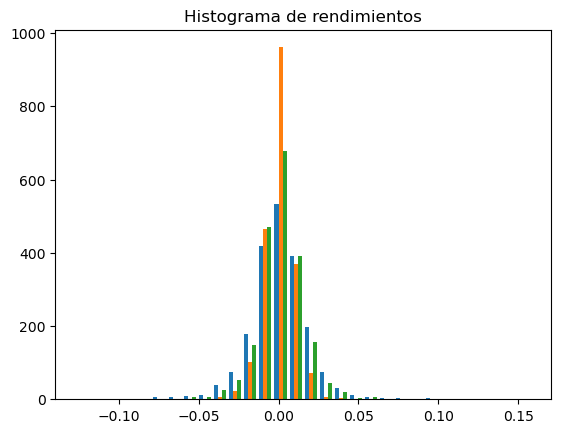

In [33]:
import matplotlib.pyplot as plt
plt.hist(retornos, bins=30)
plt.title("Histograma de rendimientos")
plt.show()
#Del histograma encontramos que la variacion de los retornos se encuentra entre -0.05 y 0.05

10.- Bosqueja la serie de tiempo para cada ticker del inciso anterior. ¿Cuáles son tus conclusiones?

<Axes: xlabel='Date'>

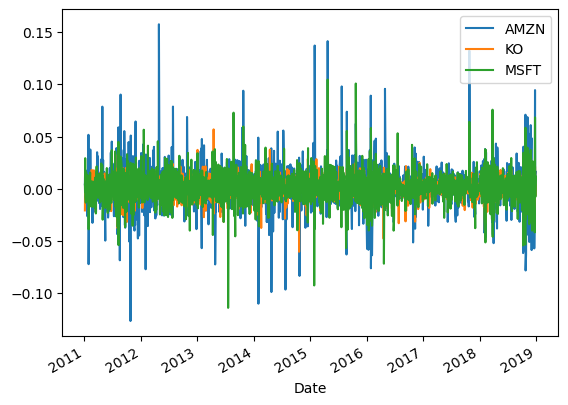

In [34]:
retornos.plot()
#Conclusion de serie de tiempo es que AMZN es más volatil que KO y MSFT